Phase 1 (All About Libraries)

In [4]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community

In [2]:
# Import Network Libraries
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import pylab as plt 
from itertools import count 
from operator import itemgetter 
from networkx.drawing.nx_agraph import graphviz_layout 
import pylab

Phase 2 (All About Dataset)

In [ ]:
# Upload Local Dataset (Nodes) 
from google.colab import files
uploaded = files.upload()

Saving quakers_nodelist.csv to quakers_nodelist (4).csv


In [ ]:
# Read in the nodelist file
with open('quakers_nodelist.csv', 'r') as nodecsv:
    nodereader = csv.reader(nodecsv)
    nodes = [n for n in nodereader][1:]

In [ ]:
# Set the Nodes Function
node_names = [n[0] for n in nodes]

In [ ]:
# Import data local (Edges)
from google.colab import files
uploaded = files.upload()

Saving quakers_edgelist.csv to quakers_edgelist (3).csv


In [ ]:
# Read in the edgelist file
with open('quakers_edgelist.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv)
    edges = [tuple(e) for e in edgereader] [1:]

In [ ]:
# Print the number of nodes and edges in our two lists
print(len(node_names))
print(len(edges))

119
174


In [ ]:
#Initialize the Function
Quakers_Network = nx.Graph() # Initialize a Graph object

In [ ]:
#Input the Nodes and Edges to the Function
Quakers_Network.add_nodes_from(node_names) 
Quakers_Network.add_edges_from(edges) 

In [ ]:
#Dataset Information
print(nx.info(Quakers_Network))

Phase 3 (All About SNA)

In [ ]:
# Show the nodes
nx.nodes(Quakers_Network)

NodeView(('Joseph Wyeth', 'Alexander Skene of Newtyle', 'James Logan', 'Dorcas Erbery', 'Lilias Skene', 'William Mucklow', 'Thomas Salthouse', 'William Dewsbury', 'John Audland', 'Richard Claridge', 'William Bradford', 'Fettiplace Bellers', 'John Bellers', 'Isabel Yeamans', 'George Fox the younger', 'George Fox', 'John Stubbs', 'Anne Camm', 'John Camm', 'Thomas Camm', 'Katharine Evans', 'Lydia Lancaster', 'Samuel Clarridge', 'Thomas Lower', 'Gervase Benson', 'Stephen Crisp', 'James Claypoole', 'Thomas Holme', 'John Freame', 'John Swinton', 'William Mead', 'Henry Pickworth', 'John Crook', 'Gilbert Latey', 'Ellis Hookes', 'Joseph Besse', 'James Nayler', 'Elizabeth Hooten', 'George Whitehead', 'John Whitehead', 'William Crouch', 'Benjamin Furly', 'Silvanus Bevan', 'Robert Rich', 'John Whiting', 'Christopher Taylor', 'Thomas Lawson', 'Richard Farnworth', 'William Coddington', 'Thomas Taylor', 'Richard Vickris', 'Robert Barclay', 'Jane Sowle', 'Tace Sowle', 'Leonard Fell', 'Margaret Fell', 

In [ ]:
# Show the edges
edges

[('George Keith', 'Robert Barclay'),
 ('George Keith', 'Benjamin Furly'),
 ('George Keith', 'Anne Conway Viscountess Conway and Killultagh'),
 ('George Keith', 'Franciscus Mercurius van Helmont'),
 ('George Keith', 'William Penn'),
 ('George Keith', 'George Fox'),
 ('George Keith', 'George Whitehead'),
 ('George Keith', 'William Bradford'),
 ('James Parnel', 'Benjamin Furly'),
 ('James Parnel', 'Stephen Crisp'),
 ('Peter Collinson', 'John Bartram'),
 ('Peter Collinson', 'James Logan'),
 ('Joseph Wyeth', 'Thomas Ellwood'),
 ('Alexander Skene of Newtyle', 'Lilias Skene'),
 ('Dorcas Erbery', 'James Nayler'),
 ('William Mucklow', 'George Fox'),
 ('Franciscus Mercurius van Helmont', 'Benjamin Furly'),
 ('William Dewsbury', 'Edward Burrough'),
 ('William Dewsbury', 'George Fox'),
 ('William Dewsbury', 'John Crook'),
 ('John Audland', 'John Camm'),
 ('John Audland', 'Francis Howgill'),
 ('John Audland', 'Edward Pyott'),
 ('John Audland', 'Charles Marshall'),
 ('John Audland', 'George Fox'),
 

In [ ]:
# Graph Density
nx.density(Quakers_Network)

0.02478279447372169

In [ ]:
#Shows the Shortest Path from Random People 
fell_whitehead_path = nx.shortest_path(Quakers_Network, source="Margaret Fell", target="George Whitehead")
print("Shortest path between Fell and Whitehead:", fell_whitehead_path)

Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']


In [ ]:
# Community Detection using Modularity
from networkx.algorithms.community import greedy_modularity_communities
greedy_modularity_communities(Quakers_Network)

[frozenset({'Anne Conway Viscountess Conway and Killultagh',
            'David Lloyd',
            'Edward Haistwell',
            'George Keith',
            'Isaac Norris',
            'Isabel Yeamans',
            'James Logan',
            'Jane Sowle',
            'John Bartram',
            'Joseph Besse',
            'Peter Collinson',
            'Richard Claridge',
            'Samuel Bownas',
            'Tace Sowle',
            'Thomas Story',
            'William Bradford',
            'William Penn'}),
 frozenset({'Anthony Pearson',
            'Dorcas Erbery',
            'Elizabeth Leavens',
            'Francis Howgill',
            'George Fox the younger',
            'Gervase Benson',
            'Hannah Stranger',
            'James Nayler',
            'Margaret Fell',
            'Martha Simmonds',
            'Richard Farnworth',
            'Robert Rich',
            'Thomas Aldam',
            'Thomas Holme',
            'Thomas Lower',
            'William G

Phase 4 (Data Visualization)

In [ ]:
# See what layouts are available in networkX

[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout']

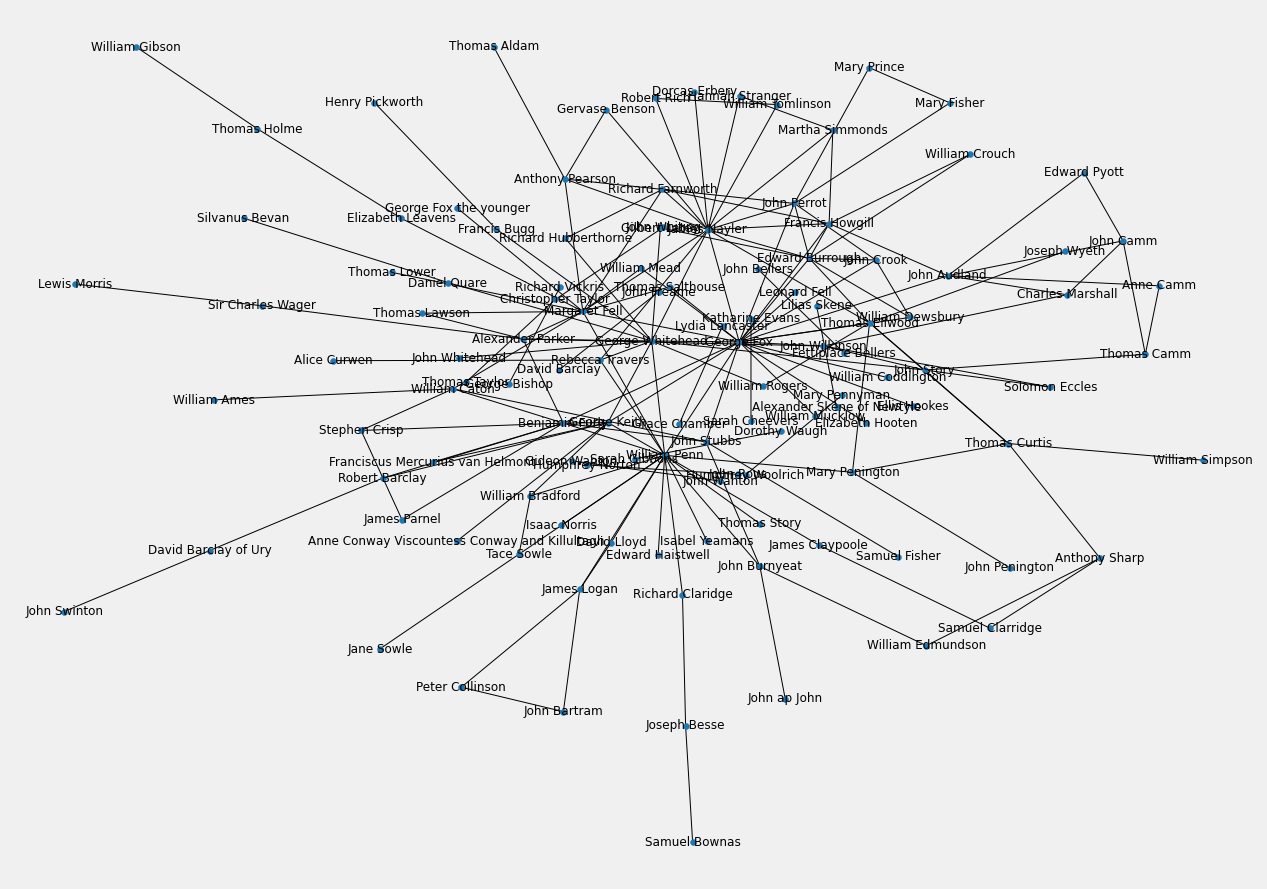

In [ ]:
#Data Visualization with Kamada Kawai Layout 
pos = nx.kamada_kawai_layout(Quakers_Network)
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
node_color = [20000.0 * Quakers_Network.degree(v) for v in Quakers_Network]
plt.axis('off')
nx.draw_networkx(Quakers_Network, pos, with_labels = True, node_size = 35)
plt.show()

(-1.0777101576682446,
 0.9812042041443086,
 -1.0879371722028084,
 1.0994255796287051)

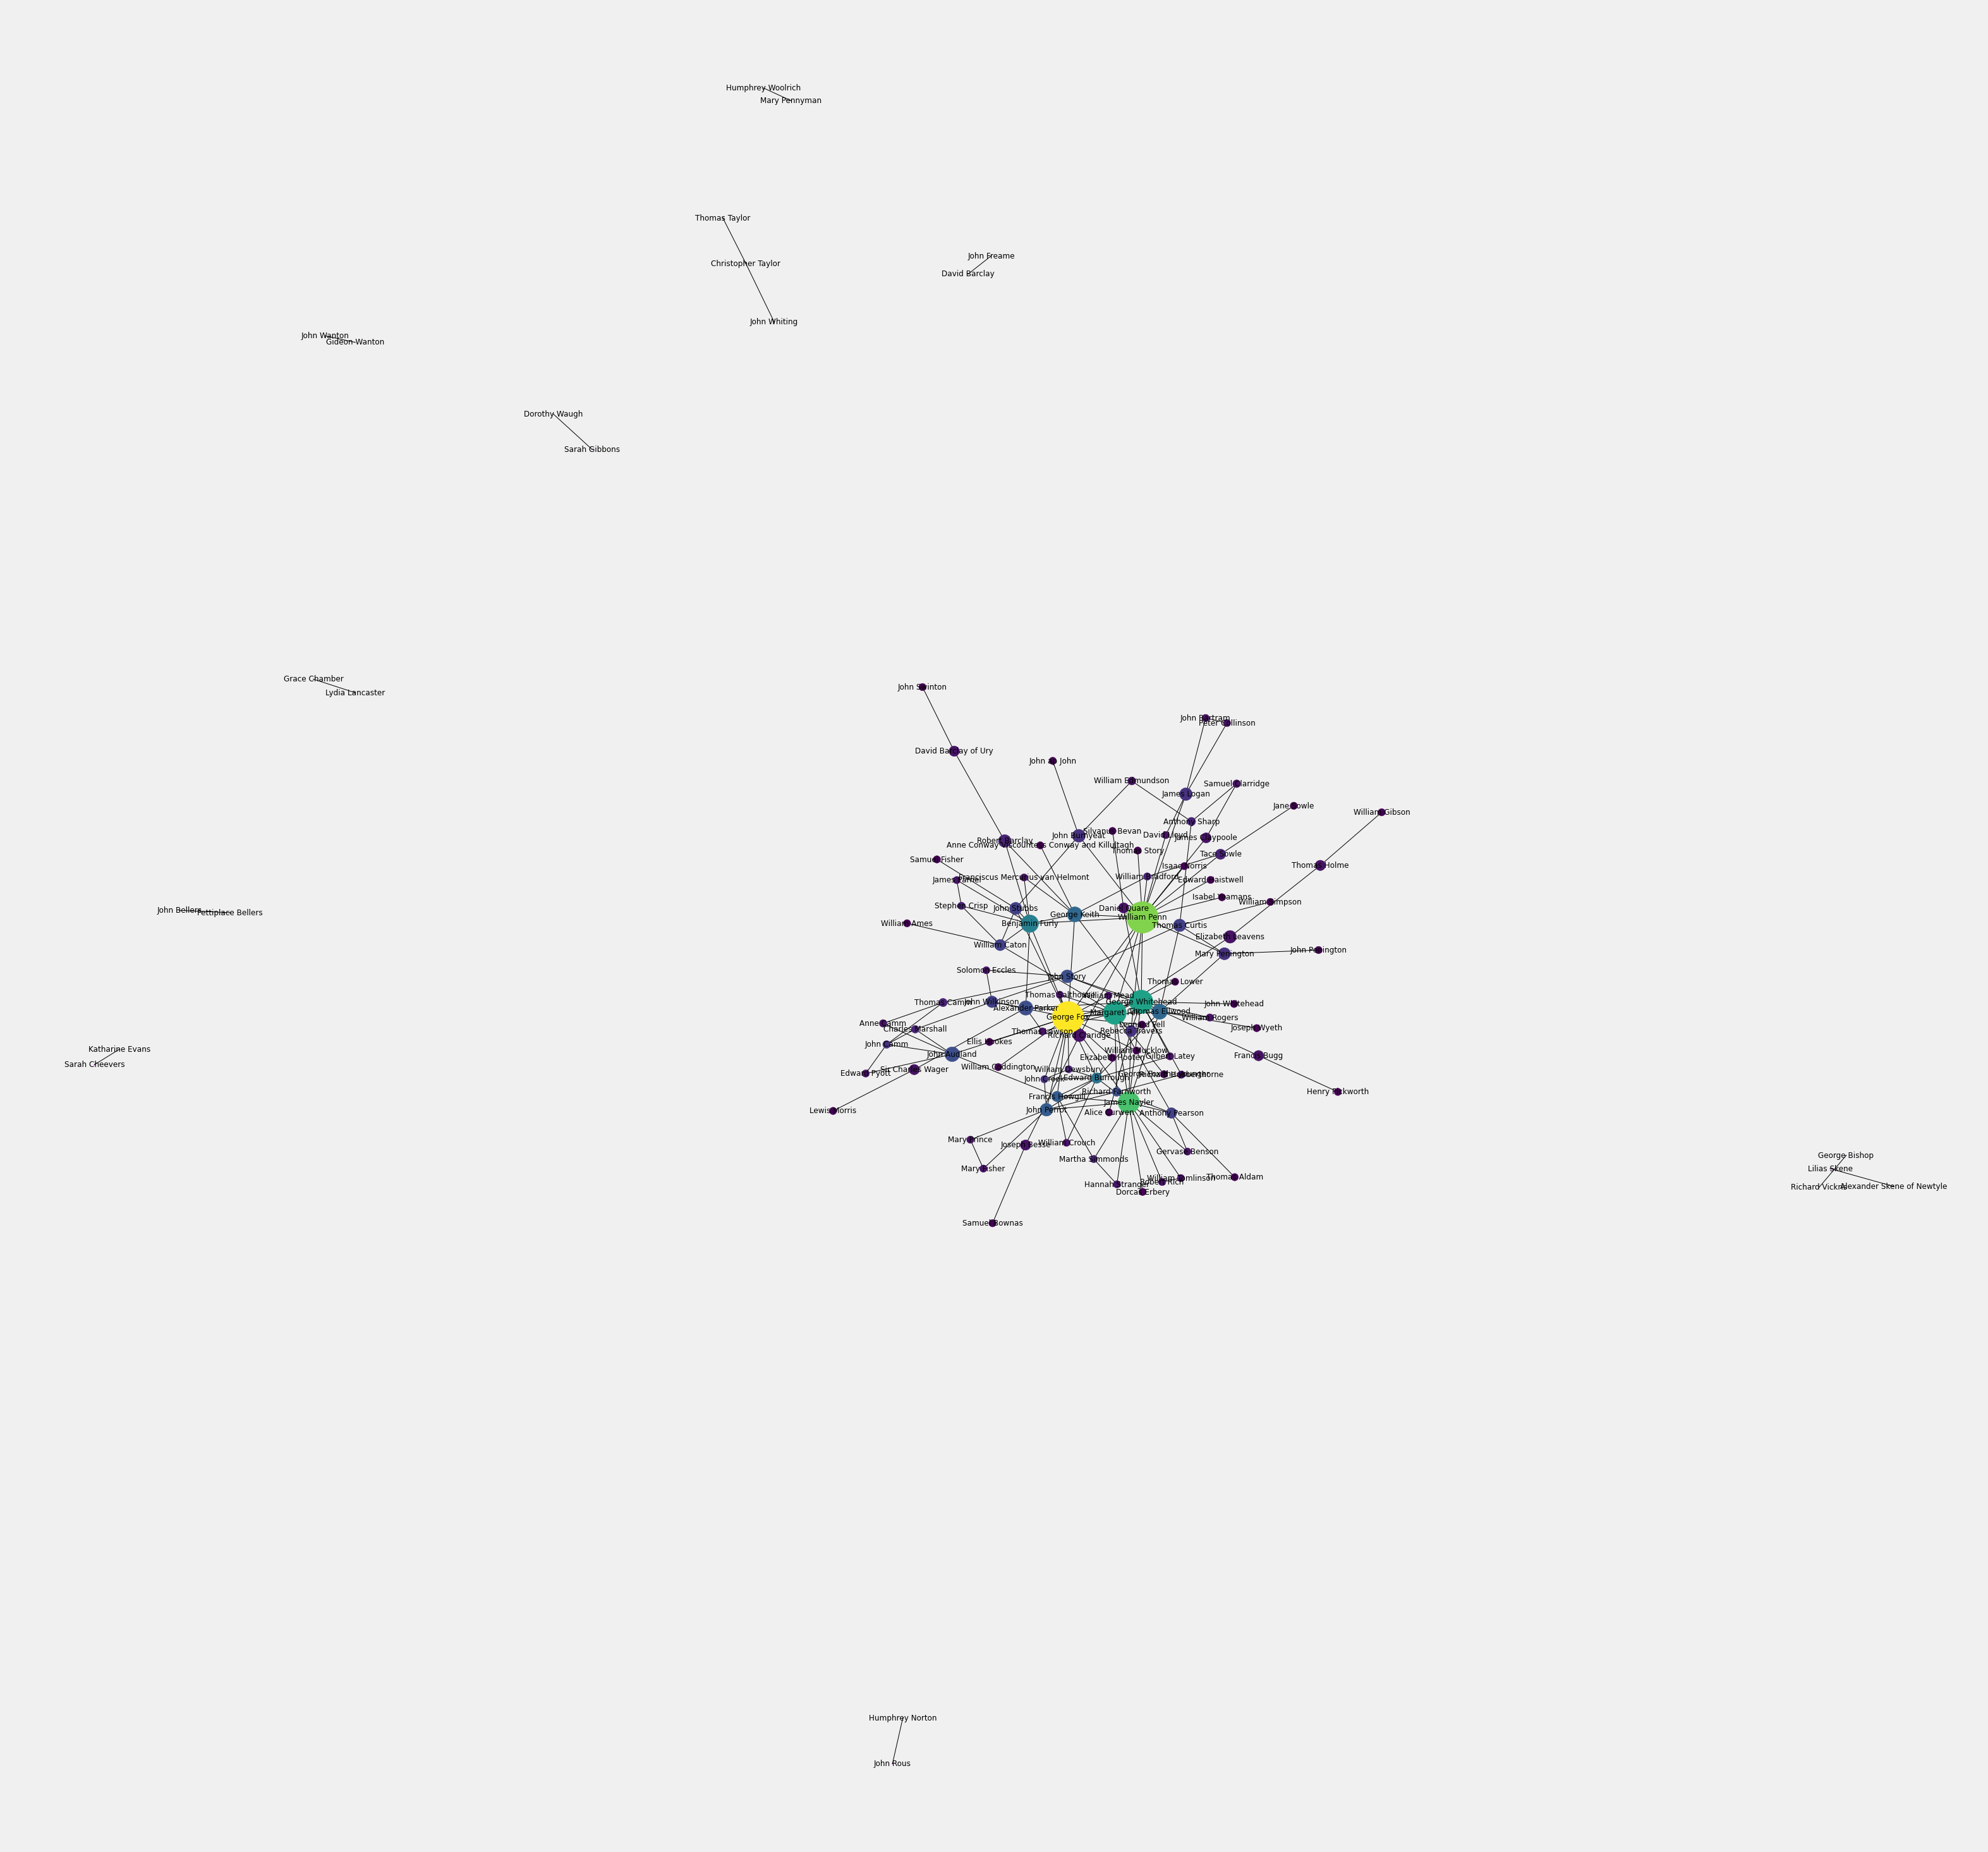

In [ ]:
#Data Visualization with Spring Layout 
pos = nx.spring_layout(Quakers_Network)
betCent = nx.betweenness_centrality(Quakers_Network, normalized=True, endpoints=True)
node_color = [20000.0 * Quakers_Network.degree(v) for v in Quakers_Network]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(50,50))
nx.draw_networkx(Quakers_Network, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

(-1.09155353281745,
 1.0439615793697037,
 -1.0074010516698295,
 1.0955905262699919)

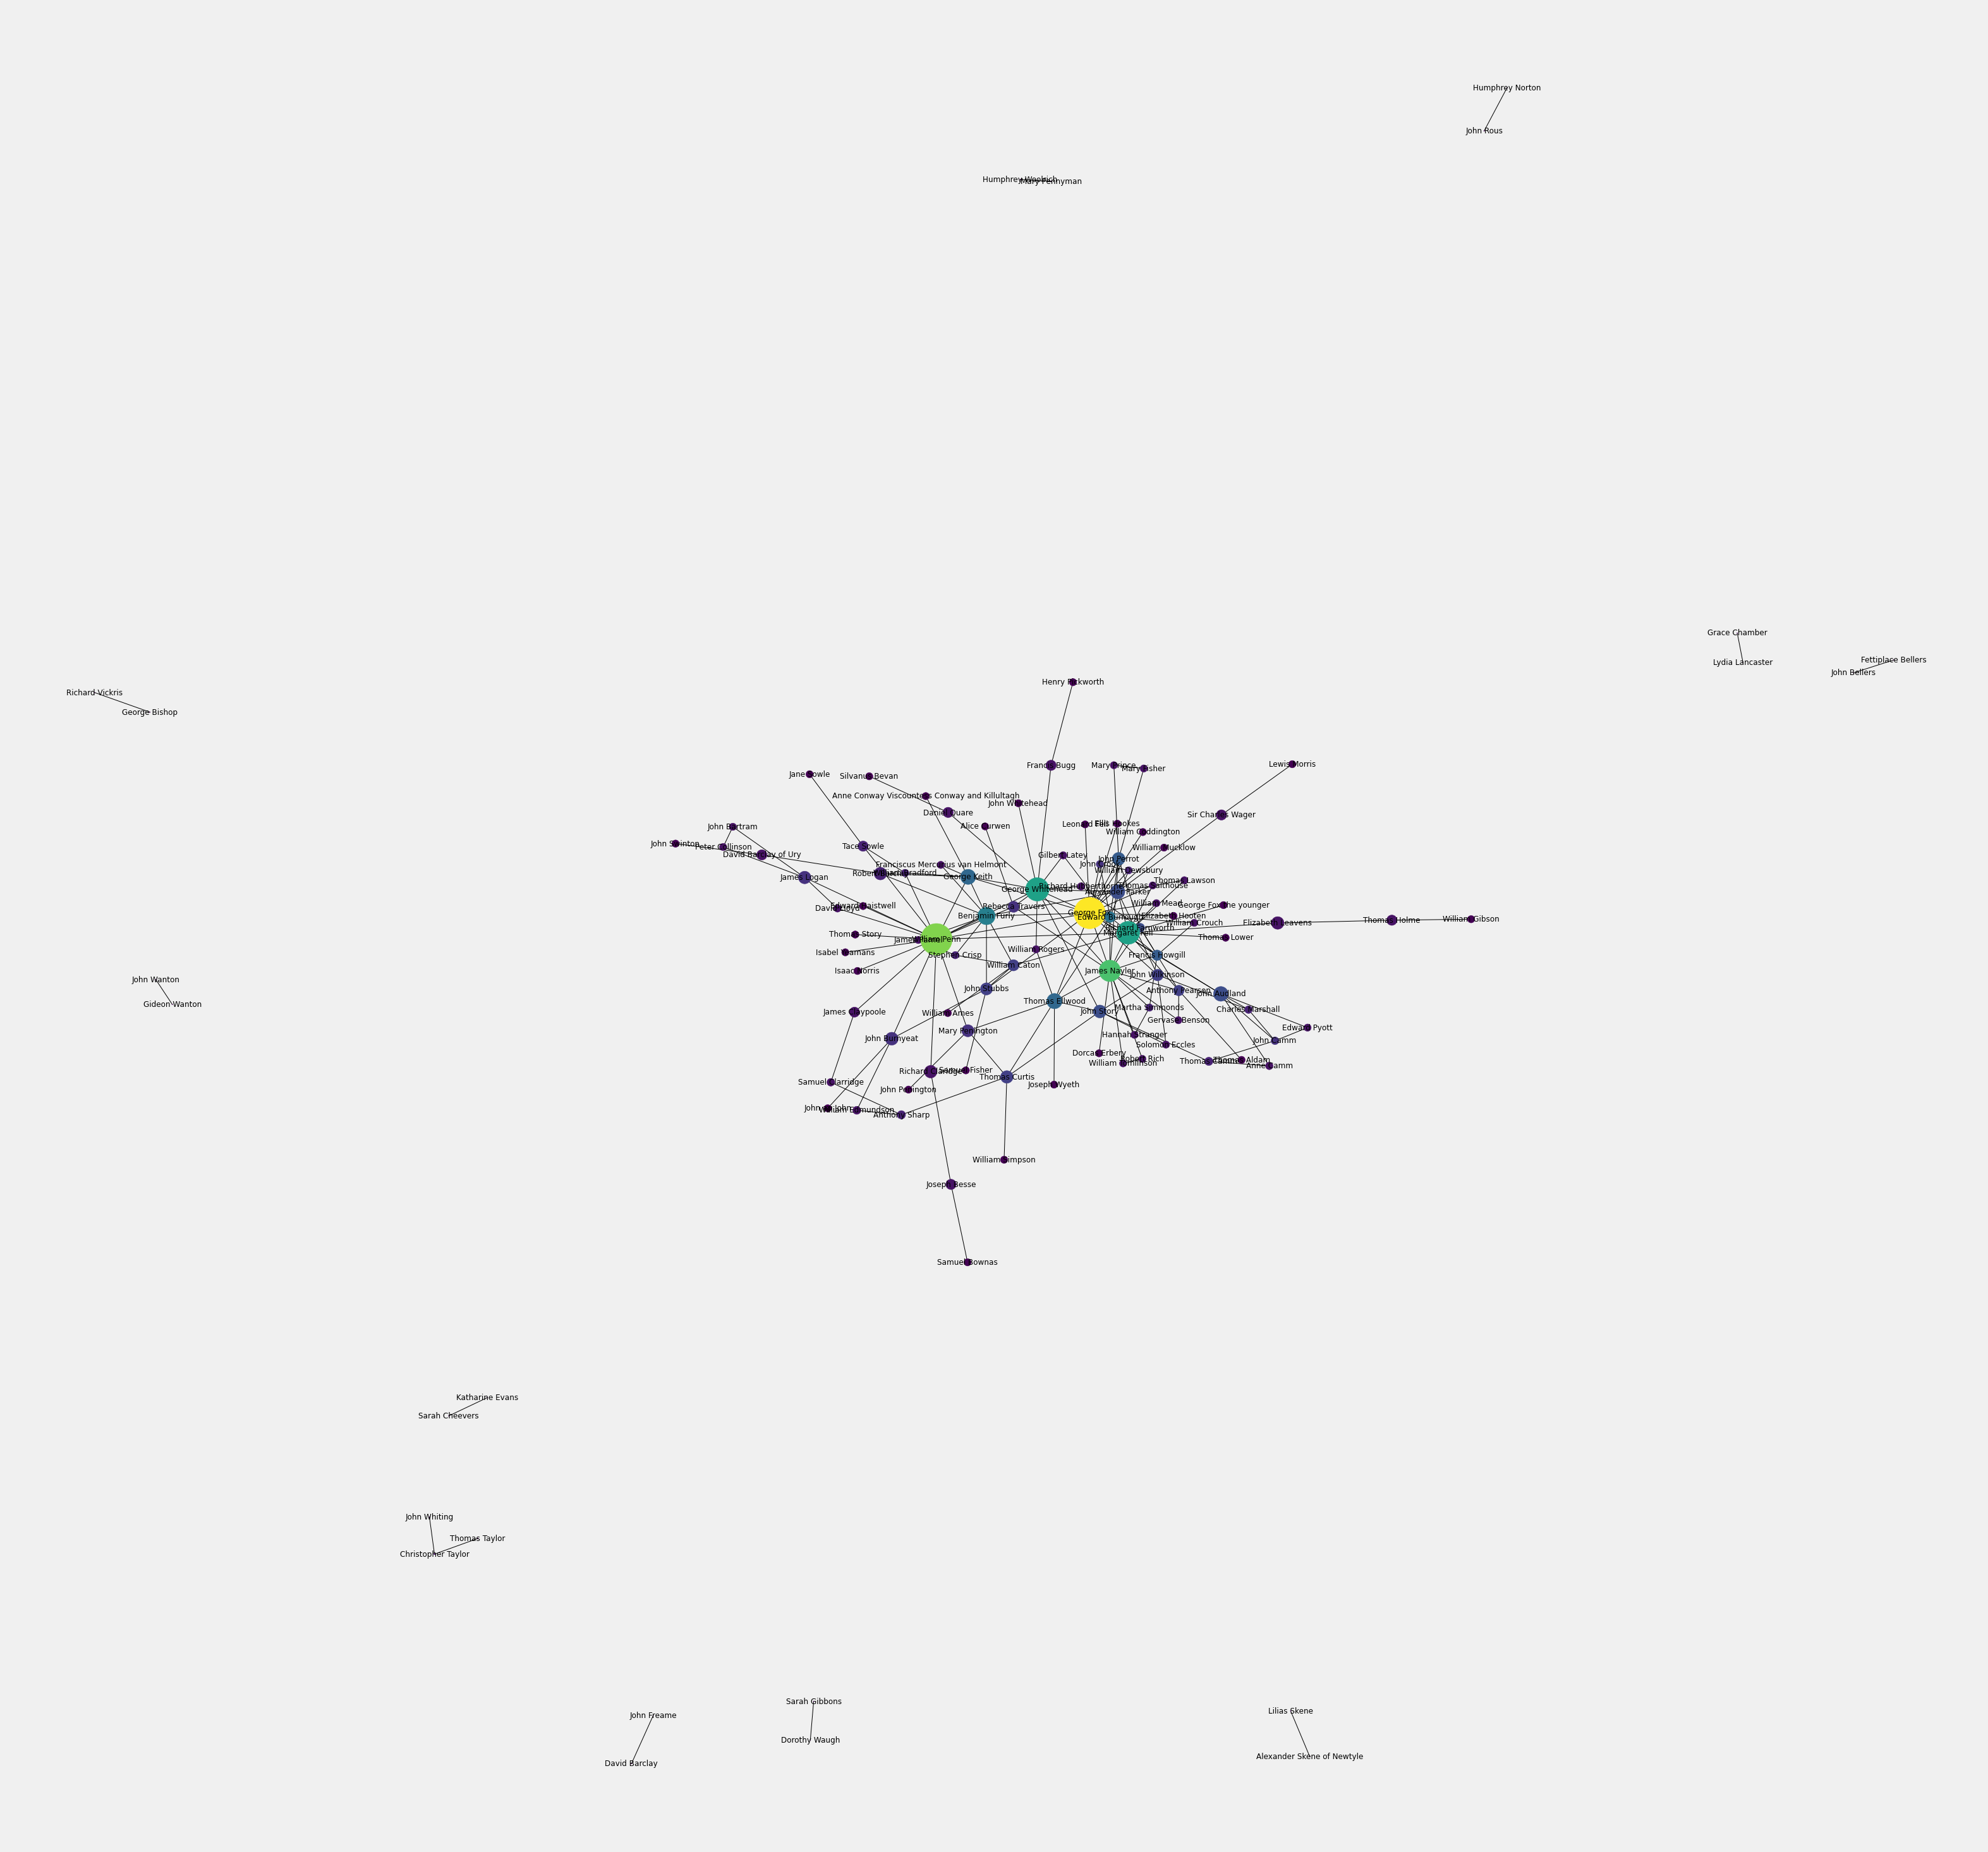

In [ ]:
##Data Visualization with Fructherman Rheingold Layout
pos = nx.fruchterman_reingold_layout(Quakers_Network)
betCent = nx.betweenness_centrality(Quakers_Network, normalized=True, endpoints=True)
node_color = [20000.0 * Quakers_Network.degree(v) for v in Quakers_Network]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(50,50))
nx.draw_networkx(Quakers_Network, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

Phase 5 (All About Key Player)

In [ ]:
# Show Node Degree
nx.degree(Quakers_Network)

DegreeView({'Joseph Wyeth': 1, 'Alexander Skene of Newtyle': 1, 'James Logan': 4, 'Dorcas Erbery': 1, 'Lilias Skene': 1, 'William Mucklow': 1, 'Thomas Salthouse': 2, 'William Dewsbury': 3, 'John Audland': 6, 'Richard Claridge': 2, 'William Bradford': 3, 'Fettiplace Bellers': 1, 'John Bellers': 1, 'Isabel Yeamans': 1, 'George Fox the younger': 1, 'George Fox': 22, 'John Stubbs': 5, 'Anne Camm': 2, 'John Camm': 4, 'Thomas Camm': 3, 'Katharine Evans': 1, 'Lydia Lancaster': 1, 'Samuel Clarridge': 2, 'Thomas Lower': 1, 'Gervase Benson': 2, 'Stephen Crisp': 3, 'James Claypoole': 2, 'Thomas Holme': 2, 'John Freame': 1, 'John Swinton': 1, 'William Mead': 2, 'Henry Pickworth': 1, 'John Crook': 4, 'Gilbert Latey': 2, 'Ellis Hookes': 1, 'Joseph Besse': 2, 'James Nayler': 16, 'Elizabeth Hooten': 1, 'George Whitehead': 13, 'John Whitehead': 1, 'William Crouch': 2, 'Benjamin Furly': 10, 'Silvanus Bevan': 1, 'Robert Rich': 2, 'John Whiting': 1, 'Christopher Taylor': 2, 'Thomas Lawson': 2, 'Richard Fa

In [ ]:
# Sorted from the highest Degree Centrality (Top 10)
sorted(nx.degree(Quakers_Network), key=lambda x: x[1], reverse=True)[0:10]

[('George Fox', 22),
 ('William Penn', 18),
 ('James Nayler', 16),
 ('George Whitehead', 13),
 ('Margaret Fell', 13),
 ('Benjamin Furly', 10),
 ('Edward Burrough', 9),
 ('George Keith', 8),
 ('Thomas Ellwood', 8),
 ('Francis Howgill', 7)]

In [ ]:
# Sorted from the highest Betweeness Centrality (Top 10)
sorted(nx.betweenness_centrality(Quakers_Network, normalized=True).items(), key=lambda x:x[1], reverse=True)[0:10]

[('William Penn', 0.23999456006192205),
 ('George Fox', 0.23683257726065216),
 ('George Whitehead', 0.12632024847366005),
 ('Margaret Fell', 0.12106792237170329),
 ('James Nayler', 0.10446026280446098),
 ('Benjamin Furly', 0.06419626175167242),
 ('Thomas Ellwood', 0.046190623885104545),
 ('George Keith', 0.045006564009171565),
 ('John Audland', 0.04164936340077581),
 ('Alexander Parker', 0.03893676140525336)]

In [ ]:
# Sorted from the highest Closeness Centrality (Top 10)
sorted(nx.closeness_centrality(Quakers_Network).items(), key=lambda x:x[1], reverse=True)[0:10]

[('George Fox', 0.39222077357670576),
 ('William Penn', 0.3730880529144274),
 ('George Whitehead', 0.3540881983678594),
 ('Margaret Fell', 0.33842057897105143),
 ('James Nayler', 0.3310954582141023),
 ('George Keith', 0.3254597908402452),
 ('Benjamin Furly', 0.3213573565019228),
 ('Thomas Ellwood', 0.30230454880418034),
 ('Edward Burrough', 0.29759941963991293),
 ('Rebecca Travers', 0.29759941963991293)]

In [ ]:
# Sorted from the highest Eigenvector Centrality (Top 10)
sorted(nx.eigenvector_centrality(Quakers_Network).items(), key=lambda x:x[1], reverse=True)[0:10]

[('George Fox', 0.4491750710859924),
 ('James Nayler', 0.3352974100447867),
 ('William Penn', 0.2703220115399868),
 ('Margaret Fell', 0.253170949905681),
 ('George Whitehead', 0.2497455334914196),
 ('Edward Burrough', 0.23147427604862297),
 ('Francis Howgill', 0.1909539378268105),
 ('Benjamin Furly', 0.1878520634691651),
 ('John Perrot', 0.1849692807795611),
 ('George Keith', 0.18384690867915351)]